In [ ]:
!pip install ts2vg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 10.0 MB/s eta 0:00:00


# Basic Data Cleaning

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import ts2vg
import networkx as nx

In [ ]:
df = pd.read_csv('Nabil bank.csv')

#Reverse the DataFrame
data = df.iloc[::-1].reset_index(drop=True)

# Display the reversed DataFrame
print(data)

     Symbol        Date   Open   High    Low  Close Percent Change     Volume
0     NABIL  2019-10-10  765.0  773.0  765.0  770.0         0.13 %     728.00
1     NABIL  2019-10-14  770.0  770.0  757.0  765.0        -0.65 %  16,518.00
2     NABIL  2019-10-15  765.0  765.0  760.0  763.0        -0.26 %   4,973.00
3     NABIL  2019-10-16  768.0  768.0  754.0  762.0        -0.13 %   4,902.00
4     NABIL  2019-10-17  762.0  765.0  759.0  760.0        -0.26 %   8,157.00
...     ...         ...    ...    ...    ...    ...            ...        ...
1123  NABIL  2024-09-30  540.0  550.5  540.0  550.0         1.57 %  49,497.00
1124  NABIL  2024-10-01  550.0  571.0  550.0  568.0         3.27 %  74,522.00
1125  NABIL  2024-10-02  571.0  579.3  565.0  565.0        -0.53 %  56,823.00
1126  NABIL  2024-10-06  565.0  574.0  556.0  574.0         1.59 %  84,468.00
1127  NABIL  2024-10-07  584.0  593.2  580.0  591.5         3.05 %  69,067.00

[1128 rows x 8 columns]


In [ ]:
columns_to_drop = ['High', 'Low', 'Volume']
data = data.drop(columns=columns_to_drop)

# Display the resulting DataFrame
print(data)

     Symbol        Date   Open  Close Percent Change
0     NABIL  2019-10-10  765.0  770.0         0.13 %
1     NABIL  2019-10-14  770.0  765.0        -0.65 %
2     NABIL  2019-10-15  765.0  763.0        -0.26 %
3     NABIL  2019-10-16  768.0  762.0        -0.13 %
4     NABIL  2019-10-17  762.0  760.0        -0.26 %
...     ...         ...    ...    ...            ...
1123  NABIL  2024-09-30  540.0  550.0         1.57 %
1124  NABIL  2024-10-01  550.0  568.0         3.27 %
1125  NABIL  2024-10-02  571.0  565.0        -0.53 %
1126  NABIL  2024-10-06  565.0  574.0         1.59 %
1127  NABIL  2024-10-07  584.0  591.5         3.05 %

[1128 rows x 5 columns]


In [ ]:
# Ensure Date is in datetime format and sort by date
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)

# total_data =  len(data)
# window_size = 30
# sliding_size = 7

In [ ]:
# Extract relevant columns: Date and Close
date = data['Date']
close_prices = data['Close']

In [ ]:
close_prices.head(30)

,Close
0,770.0
1,765.0
2,763.0
3,762.0
4,760.0
5,757.0
6,758.0
7,756.0
8,762.0
9,768.0


In [ ]:
# def calculate_metrics(g):
#   density = nx.density(g)
#   if nx.is_connected(g):
#     path_length = nx.average_shortest_path_length(g)
#   else:
#     path_length = None
#   clustering_coefficient = nx.average_clustering(g)
#   return density, path_length, clustering_coefficient

In [ ]:
# for i in range(0, total_data - window_size+1, sliding_size ):
#     window_data = data.iloc[i:i + window_size]

#     plt.figure(figsize=(12, 6))
#     plt.plot(window_data['Date'], window_data['Close'], label=f'Close Price (Window {i // sliding_size + 1})')
#     plt.xticks([0, len(window_data) - 1], [window_data['Date'].iloc[0], window_data['Date'].iloc[-1]], rotation=45)
#     plt.xlabel('Date')
#     plt.ylabel('Close Price')
#     plt.title(f'Close Price History - Window {i // sliding_size + 1}')
#     plt.xticks(rotation=45)
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

#     close_prices = window_data['Close'].values
#     VG = ts2vg.NaturalVG(directed = None)
#     VG.build(close_prices)

#     nxg = VG.as_networkx()

#     plt.figure(figsize=(12, 6))
#     nx.draw_networkx(nxg, pos=VG.node_positions(), node_size=50, node_color="black", edge_color="green", with_labels=False)
#     plt.title(f'Visibility Graph for window {i} to {i + window_size}')
#     plt.show()

#     nx.draw_networkx(nxg, pos=nx.kamada_kawai_layout(nxg), node_size=50, node_color="green", edge_color="blue", with_labels=False)
#     plt.title(f"Visibility Graph for window {i} to {i + window_size}")
#     plt.show()



In [ ]:
# from ts2vg import NaturalVG

# for i in range(0, window_size -1, sliding_size):
#   window_data = data.iloc[i:i+window_size]
#   closing_price = window_data['Close'].values
#   #now build the visibility graph for the current loop window
#   VG = NaturalVG().build(closing_price)
#   nxg = VG.as_networkx() #convert to netorkx graph
#   #call the function, get the value
#   density, path_length, clustering_coefficient = calculate_metrics(nxg)
#   print(f"Graph Metrics of window {i// sliding_size +1}: Density = {density}, Path_length = {path_length},Clustering Coefficient={clustering_coefficient}")

#   matrix = nx.to_numpy_array(nxg)
#   print(f"Adjacency matrix of window {i// sliding_size +1}")
#   print(matrix)

# Labeling the graph

In [ ]:
import numpy as np
from scipy.signal import argrelextrema

In [ ]:
def find_knee_points(prices, order):
    # Local maxima and minima indices
    maxima = argrelextrema(prices, np.greater, order=order)[0]
    minima = argrelextrema(prices, np.less, order=order)[0]
    return maxima, minima

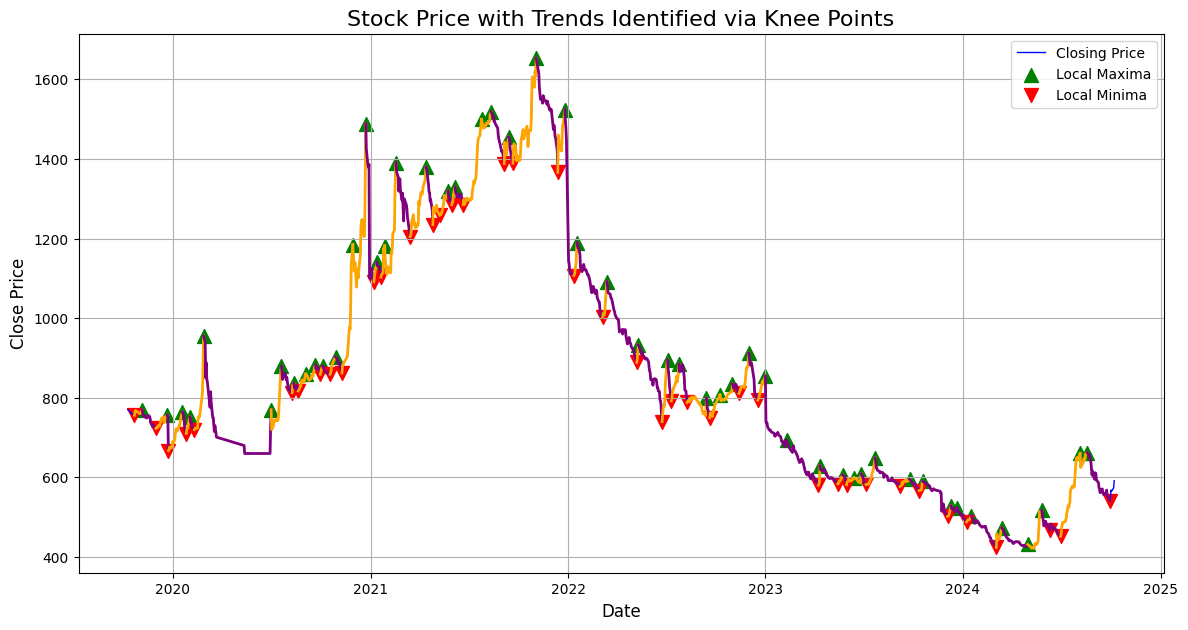

In [ ]:
# points on either side to consider when making the comparison
order = 7
maxima_indices, minima_indices = find_knee_points(close_prices.values, order=order)

# Combine and sort maxima and minima indices for trend labeling
knee_points = sorted(list(maxima_indices) + list(minima_indices))

# Calculate trends between consecutive knee points
labels_knee_points = []
for i in range(len(knee_points) - 1):
    start_idx, end_idx = knee_points[i], knee_points[i + 1]
    if close_prices.values[end_idx] > close_prices.values[start_idx]:
        labels_knee_points.append((start_idx, end_idx, 1))  # Upward trend
    else:
        labels_knee_points.append((start_idx, end_idx, 0))  # Downward trend


# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(date, close_prices, label='Closing Price', color='blue', linewidth=1)
plt.scatter(date.iloc[maxima_indices], close_prices.iloc[maxima_indices], color='green', label='Local Maxima', marker='^', s=100)
plt.scatter(date.iloc[minima_indices], close_prices.iloc[minima_indices], color='red', label='Local Minima', marker='v', s=100)

# Highlight trend segments
for start_idx, end_idx, label in labels_knee_points:
    color = 'orange' if label == 1 else 'purple'  # Upward: orange, Downward: purple
    plt.plot(date.iloc[start_idx:end_idx + 1], close_prices.iloc[start_idx:end_idx + 1], color=color, linewidth=2)

# Add labels and legend
plt.title('Stock Price with Trends Identified via Knee Points', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Add labels to the original dataset
trend_labels = np.full(len(close_prices), np.nan)
for start_idx, end_idx, label in labels_knee_points:
    trend_labels[start_idx:end_idx + 1] = label

data['Trend Label'] = trend_labels

 # Remove the empty values
data = data.dropna(subset=['Trend Label'])

In [ ]:
data.sample()

,Symbol,Date,Open,Close,Percent Change,Trend Label
1013,NABIL,2024-04-10,440.0,438.0,-0.23 %,0.0


In [ ]:
count_zeros = (data['Trend Label'] == 0).sum()
count_ones = (data['Trend Label'] == 1).sum()
print(count_zeros, count_ones)

622 494


In [ ]:
data['Trend Label'].astype(int)

,Trend Label
7,1
8,1
9,1
10,1
11,1
...,...
1118,0
1119,0
1120,0
1121,0


In [ ]:
data.head(30)

,Symbol,Date,Open,Close,Percent Change,Trend Label
7,NABIL,2019-10-22,758.0,756.0,-0.26 %,1.0
8,NABIL,2019-10-23,756.0,762.0,0.79 %,1.0
9,NABIL,2019-10-24,765.0,768.0,0.79 %,1.0
10,NABIL,2019-10-31,768.0,761.0,-0.91 %,1.0
11,NABIL,2019-11-03,760.0,760.0,-0.13 %,1.0
12,NABIL,2019-11-04,764.0,768.0,1.05 %,1.0
13,NABIL,2019-11-05,775.0,770.0,0.26 %,0.0
14,NABIL,2019-11-06,774.0,768.0,-0.26 %,0.0
15,NABIL,2019-11-07,772.0,755.0,-1.69 %,0.0
16,NABIL,2019-11-10,760.0,755.0,0.00 %,0.0


In [ ]:
# Save the labeled dataset to a new CSV file
data.to_csv('Labeled_CHCL.csv', index=False)

# Display the labeled dataset
data.sample()

,Symbol,Date,Open,Close,Percent Change,Trend Label
200,NABIL,2020-11-05,890.0,880.0,-0.90 %,0.0


# Constructing Visibility graph

In [ ]:
import networkx as nx
from tqdm import tqdm

In [ ]:
# # Visualize a single visibility graph
# def visualize_visibility_graph(G, prices, title="Visibility Graph"):
#     plt.figure(figsize=(10, 6))
#     pos = {i: (i, prices[i]) for i in range(len(prices))}  # Position nodes by time and price
#     nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, edge_color='gray')
#     plt.plot(range(len(prices)), prices, label='Price Time Series', color='blue', alpha=0.7)
#     plt.title(title)
#     plt.xlabel("Time")
#     plt.ylabel("Price")
#     plt.legend()
#     plt.show()


In [ ]:
# def add_trend_strength_features(G):
#     """
#     Adds trend strength (degree centrality) as a node feature in the visibility graph.

#     Parameters:
#         G (networkx.Graph): The visibility graph.
#     """
#     degree_centrality = nx.degree_centrality(G)
#     nx.set_node_attributes(G, degree_centrality, "trend_strength")


In [ ]:
def calculate_trend_strength(graph):
    """
    Adds trend strength (degree centrality) as a node feature to the visibility graph.

    Parameters:
        graph (networkx.Graph): The visibility graph.

    Returns:
        networkx.Graph: The graph with trend strength as a node feature.
    """
    # Compute degree centrality
    degree_centrality = nx.degree_centrality(graph)

    # Add trend strength as a feature for each node
    for node in graph.nodes:
        graph.nodes[node]['trend_strength'] = degree_centrality[node]

    return graph


In [ ]:
def construct_visibility_graph_with_features(prices):
    G = nx.Graph()
    n = len(prices)
    for i in range(n):
        G.add_node(i, price=prices[i], normalized_price=(prices[i] - min(prices)) / (max(prices) - min(prices)))
    for i in range(n):
        for j in range(i + 1, n):
            is_visible = True
            for k in range(i + 1, j):
                interpolated_height = prices[i] + (prices[j] - prices[i]) * (k - i) / (j - i)
                if prices[k] >= interpolated_height:
                    is_visible = False
                    break
            if is_visible:
                G.add_edge(i, j)
    return G

def visualize_prices_with_visibility_graph(prices, G):
    plt.figure(figsize=(10, 6))

    # Plot the prices as a time series
    plt.plot(range(len(prices)), prices, marker='o', label='Prices', color='blue', zorder=1)

    # Annotate each point with its price value
    for i, price in enumerate(prices):
        plt.text(i, price, f"{price:.0f}", ha='center', va='bottom', fontsize=10, color='black', zorder=2)

    # Plot edges from the visibility graph
    for edge in G.edges:
        i, j = edge
        plt.plot([i, j], [prices[i], prices[j]], color='gray', linestyle='--', zorder=0, alpha=0.7)

    plt.title("Time Series with Visibility Graph Edges", fontsize=14)
    plt.xlabel("Time (Index)", fontsize=12)
    plt.ylabel("Prices", fontsize=12)
    plt.grid(alpha=0.4)
    plt.legend()
    plt.show()

In [ ]:

# Read the raw dataset
data = pd.read_csv("Labeled_CHCL.csv")
close_prices = data['Close'].values
labels = data['Trend Label'].values

data['normalized_price'] = (data['Close'] - data['Close'].min()) / (data['Close'].max() - data['Close'].min())


In [ ]:
# Function to create visibility graphs for all windows of a given size
def create_visibility_graphs(data, column_name, window_size):
    """
    Creates visibility graphs for sliding windows from a given dataset.

    Parameters:
        data (pd.DataFrame): The input dataset.
        column_name (str): The column to use for the visibility graph (e.g., 'Close').
        window_size (int): The number of points in each window.

    Returns:
        list: A list of visibility graphs (NetworkX Graph objects).
    """
    graphs = []
    num_windows = len(data) - window_size + 1

    for i in range(num_windows):
        window_prices = data[column_name].iloc[i:i + window_size].values
        G = construct_visibility_graph_with_features(window_prices)
        G = calculate_trend_strength(G)
        graphs.append(G)

    return graphs

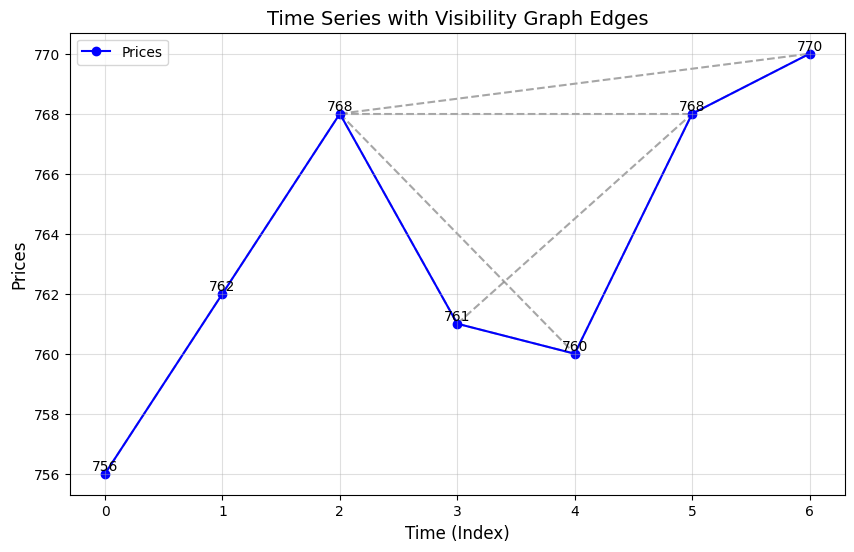

In [ ]:
# Function to visualize a specific or say single in our case : visibility graph from the list of graphs
def visualize_graph_from_list(graphs, data, column_name, index, window_size):
    """
    Parameters:
        graphs (list): The list of visibility graphs.
        data : The original dataset.
        column_name : The column used for visibility graphs (i.e., 'Close').
        index : The index of the graph to visualize. like: first graph to or second or third or what we want to visualize.
        window_size : The number of points in each window.
    """
    window_prices = data[column_name].iloc[index:index + window_size].values
    visualize_prices_with_visibility_graph(window_prices, graphs[index])

# Create visibility graphs for windows of size ...
window_size = 7
visibility_graphs = create_visibility_graphs(data, 'Close', window_size)

# Visualize the first visibility graph from the list
visualize_graph_from_list(visibility_graphs, data, 'Close', index=0, window_size=window_size)

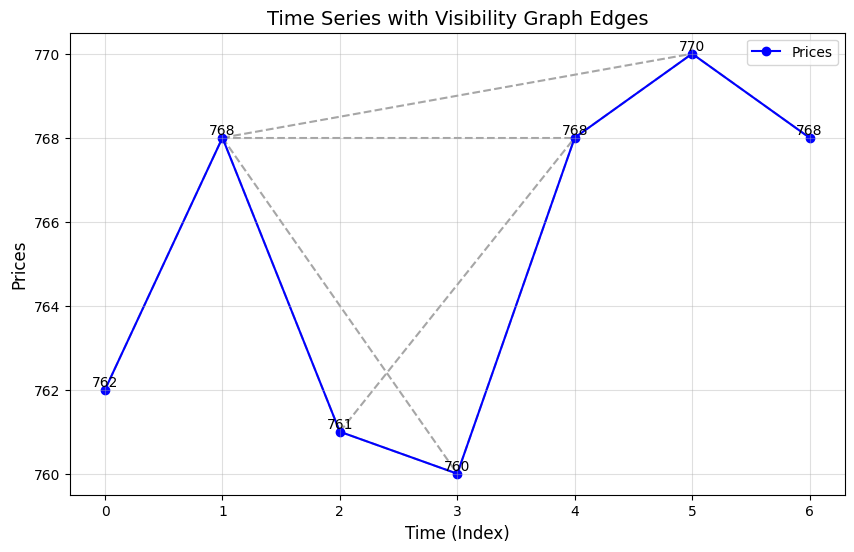

In [ ]:
visualize_graph_from_list(visibility_graphs, data, 'Close', index=1, window_size=window_size)

In [ ]:
def create_graph_labels(data, column_name, window_size):
    """
    Creates a label for each graph based on the average trend in the window.

    Parameters:
        data , pd.DataFrame): The input dataset.
        column_name : The column to use for the trend (e.g., 'Trend Label').
        window_size : The number of points in each window.

      It Returns a list of graph labels (0 or 1).
    """
    labels = []
    num_windows = len(data) - window_size + 1

    for i in range(num_windows):
        window_trend = data[column_name].iloc[i:i + window_size].values
        average_trend = np.mean(window_trend)
        # Assign label based on average trend
        label = 1 if average_trend >= 0.5 else 0
        labels.append(label)

    return labels

# Create labels for visibility graphs
graph_labels = create_graph_labels(data, 'Trend Label', window_size)

In [ ]:
import pickle

# Save visibility graphs as a pickle file
with open("visibility_graphs_degree_centrality.pkl", "wb") as f:
    pickle.dump(visibility_graphs, f)

# Save graph labels as a NumPy array
np.save("graph_labels_degree_centrality.npy", graph_labels)

In [ ]:
# Load visibility graphs
with open("visibility_graphs_degree_centrality.pkl", "rb") as f:
    loaded_graphs = pickle.load(f)

print(f"Type of loaded_graphs: {type(loaded_graphs)}")  # Expect list
print(f"Length of loaded_graphs: {len(loaded_graphs)}")  # Should match original length
print(f"First element type: {type(loaded_graphs[0])}")  # Expect <class 'networkx.classes.graph.Graph'>
print(f"First graph nodes: {loaded_graphs[0].nodes(data=True)}")


Type of loaded_graphs: <class 'list'>
Length of loaded_graphs: 1110
First element type: <class 'networkx.classes.graph.Graph'>
First graph nodes: [(0, {'price': 756.0, 'normalized_price': 0.0, 'trend_strength': 0.16666666666666666}), (1, {'price': 762.0, 'normalized_price': 0.42857142857142855, 'trend_strength': 0.3333333333333333}), (2, {'price': 768.0, 'normalized_price': 0.8571428571428571, 'trend_strength': 0.8333333333333333}), (3, {'price': 761.0, 'normalized_price': 0.35714285714285715, 'trend_strength': 0.5}), (4, {'price': 760.0, 'normalized_price': 0.2857142857142857, 'trend_strength': 0.5}), (5, {'price': 768.0, 'normalized_price': 0.8571428571428571, 'trend_strength': 0.6666666666666666}), (6, {'price': 770.0, 'normalized_price': 1.0, 'trend_strength': 0.3333333333333333})]


In [ ]:
print(f"First 10 graph labels: {graph_labels[:10]}")  # Inspect first 10 labels
print(f"Last 10 graph labels: {graph_labels[-10:]}")  # Inspect last 10 labels


First 10 graph labels: [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
Last 10 graph labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# Load the saved visibility graphs
with open("visibility_graphs_degree_centrality.pkl", "rb") as f:
    visibility_graphs = pickle.load(f)

first_graph = visibility_graphs[0]

# Display information about the graph
print(f"Number of nodes: {len(first_graph.nodes)}")
print(f"Number of edges: {len(first_graph.edges)}")
print("Nodes:", list(first_graph.nodes))
print("Edges:", list(first_graph.edges))


Number of nodes: 7
Number of edges: 10
Nodes: [0, 1, 2, 3, 4, 5, 6]
Edges: [(0, 1), (1, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (4, 5), (5, 6)]




```
# This is formatted as code
```

# Preparing for the GNN module train

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install torch-geometric

Looking in indexes: https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.6 MB/s eta 0:00:00


In [ ]:
for _, data in visibility_graphs[0].nodes(data=True):
  print(data)

{'price': 756.0, 'normalized_price': 0.0, 'trend_strength': 0.16666666666666666}
{'price': 762.0, 'normalized_price': 0.42857142857142855, 'trend_strength': 0.3333333333333333}
{'price': 768.0, 'normalized_price': 0.8571428571428571, 'trend_strength': 0.8333333333333333}
{'price': 761.0, 'normalized_price': 0.35714285714285715, 'trend_strength': 0.5}
{'price': 760.0, 'normalized_price': 0.2857142857142857, 'trend_strength': 0.5}
{'price': 768.0, 'normalized_price': 0.8571428571428571, 'trend_strength': 0.6666666666666666}
{'price': 770.0, 'normalized_price': 1.0, 'trend_strength': 0.3333333333333333}


In [ ]:
import torch
from torch_geometric.data import Data, Dataset

class VisibilityGraphDataset(Dataset):
    def __init__(self, graphs, labels):
        super().__init__()
        self.graphs = graphs
        self.labels = labels

    def len(self):
        return len(self.graphs)

    def get(self, idx):
        # Convert NetworkX graph to PyTorch Geometric Data
        G = self.graphs[idx]
        label = self.labels[idx]

        # Node features
        node_features = []
        for _, data in G.nodes(data=True):
            node_features.append([data['normalized_price'], data['trend_strength']])
        x = torch.tensor(node_features, dtype=torch.float)

        # Edge index
        edge_index = torch.tensor(list(G.edges), dtype=torch.long).t().contiguous()

        # Edge attributes (if any, optional)
        edge_attr = None

        # Label
        y = torch.tensor(label, dtype=torch.long)

        return Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)

# Load data
visibility_graphs = np.load("visibility_graphs_degree_centrality.pkl", allow_pickle=True)
graph_labels = np.load("graph_labels_degree_centrality.npy", allow_pickle=True)


# Initialize dataset
dataset = VisibilityGraphDataset(visibility_graphs, graph_labels)


In [ ]:
from torch_geometric.loader import DataLoader
from sklearn.model_selection import train_test_split

train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx, val_idx = train_test_split(train_idx, test_size=0.2, random_state=42)

train_dataset = dataset[train_idx]
val_dataset = dataset[val_idx]
test_dataset = dataset[test_idx]

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
for batch in train_loader:
    print(batch)
    break

DataBatch(x=[224, 2], edge_index=[2, 378], y=[32], batch=[224], ptr=[33])


In [ ]:
for i in range(32):
    print(f"Graph {i}:")
    print(f"Nodes: {dataset[i].x}")
    print(f"Edges: {dataset[i].edge_index}")
    print(f"Label: {dataset[i].y}")

Graph 0:
Nodes: tensor([[0.0000, 0.1667],
        [0.4286, 0.3333],
        [0.8571, 0.8333],
        [0.3571, 0.5000],
        [0.2857, 0.5000],
        [0.8571, 0.6667],
        [1.0000, 0.3333]])
Edges: tensor([[0, 1, 2, 2, 2, 2, 3, 3, 4, 5],
        [1, 2, 3, 4, 5, 6, 4, 5, 5, 6]])
Label: 1
Graph 1:
Nodes: tensor([[0.2000, 0.1667],
        [0.8000, 0.8333],
        [0.1000, 0.5000],
        [0.0000, 0.5000],
        [0.8000, 0.6667],
        [1.0000, 0.5000],
        [0.8000, 0.1667]])
Edges: tensor([[0, 1, 1, 1, 1, 2, 2, 3, 4, 5],
        [1, 2, 3, 4, 5, 3, 4, 4, 5, 6]])
Label: 1
Graph 2:
Nodes: tensor([[0.8667, 0.6667],
        [0.4000, 0.5000],
        [0.3333, 0.5000],
        [0.8667, 0.6667],
        [1.0000, 0.5000],
        [0.8667, 0.3333],
        [0.0000, 0.1667]])
Edges: tensor([[0, 0, 0, 0, 1, 1, 2, 3, 4, 5],
        [1, 2, 3, 4, 2, 3, 3, 4, 5, 6]])
Label: 1
Graph 3:
Nodes: tensor([[0.4000, 0.3333],
        [0.3333, 0.3333],
        [0.8667, 0.5000],
        [1.0000, 0

In [ ]:
from torch.nn import Module, Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool

class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.conv3 = GCNConv(hidden_dim, hidden_dim)

        self.fc = torch.nn.Linear(hidden_dim, output_dim)  # Output logits for all classes

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        # Graph Convolution Layers... activation funciton after each convilution is applied yeha chai
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        x = torch.relu(x)
        x = self.conv3(x, edge_index)
        x = torch.relu(x)


        # Global Mean Pooling
        x = global_mean_pool(x, batch)

        # Fully Connected Layer for Output
        x = self.fc(x)
        return x

In [ ]:
from torch.optim import Adam
# trainingggggfuciton
def train(loader):
    model.train()  # Set the model to training mode
    total_loss = 0
    for data in loader:
        optimizer.zero_grad()  # Zero gradients before backpropagation
        out = model(data)  # Output logits of shape [batch_size, num_classes]
        loss = criterion(out, data.y)  # Compute the loss (CrossEntropyLoss)
        loss.backward()  # Backpropagate the loss
        optimizer.step()  # Update model weights
        total_loss += loss.item()  # Accumulate loss
    return total_loss / len(loader)  # Return average loss for the epoch

# Evaluation function
def evaluate(loader):
    model.eval()  # Set to evaluation
    correct = 0
    for data in loader:
        out = model(data)  # Get the logits from the model
        pred = out.argmax(dim=1)  # Get the predicted class (index of max logit)
        correct += (pred == data.y).sum().item()  # Count correct predictions
    return correct / len(loader.dataset)  # Return accuracy

In [ ]:
# Model initialization
model = GCN(input_dim=2, hidden_dim=128, output_dim=len(set(graph_labels)))
optimizer = Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate of 0.001
criterion = torch.nn.CrossEntropyLoss()  # CrossEntropyLoss for classification

# Training the model
epochs = 100
for epoch in range(epochs):
    train_loss = train(train_loader)  # Train the model on training data
    val_accuracy = evaluate(val_loader)  # Evaluate model on validation data
    print(f"Epoch {epoch+1}/{epochs}, Loss: {train_loss:.4f}, Validation Accuracy: {val_accuracy:.2%}")


Epoch 1/100, Loss: 0.6446, Validation Accuracy: 75.28%
Epoch 2/100, Loss: 0.5152, Validation Accuracy: 79.21%
Epoch 3/100, Loss: 0.4999, Validation Accuracy: 76.97%
Epoch 4/100, Loss: 0.5012, Validation Accuracy: 79.21%
Epoch 5/100, Loss: 0.4795, Validation Accuracy: 79.78%
Epoch 6/100, Loss: 0.4741, Validation Accuracy: 80.34%
Epoch 7/100, Loss: 0.4831, Validation Accuracy: 78.09%
Epoch 8/100, Loss: 0.5031, Validation Accuracy: 80.34%
Epoch 9/100, Loss: 0.4831, Validation Accuracy: 80.34%
Epoch 10/100, Loss: 0.4792, Validation Accuracy: 80.34%
Epoch 11/100, Loss: 0.4795, Validation Accuracy: 79.21%
Epoch 12/100, Loss: 0.4857, Validation Accuracy: 80.34%
Epoch 13/100, Loss: 0.4830, Validation Accuracy: 79.78%
Epoch 14/100, Loss: 0.4896, Validation Accuracy: 78.65%
Epoch 15/100, Loss: 0.5021, Validation Accuracy: 80.34%
Epoch 16/100, Loss: 0.4870, Validation Accuracy: 79.78%
Epoch 17/100, Loss: 0.4898, Validation Accuracy: 78.65%
Epoch 18/100, Loss: 0.4728, Validation Accuracy: 80.34%
E

In [ ]:
from torch_geometric.nn import global_mean_pool
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Function to test the model
def test_model(loader):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():  # Disable gradient computation for testing
        for data in loader:
            out = model(data)  # Get the logits from the model
            preds = out.argmax(dim=1)  # Get the predicted class (index of max logit)
            all_preds.extend(preds.cpu().numpy())  # Convert to NumPy array for metrics
            all_labels.extend(data.y.cpu().numpy())  # Ground-truth labels

    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='binary')
    recall = recall_score(all_labels, all_preds, average='binary')
    f1 = f1_score(all_labels, all_preds, average='binary')

    return accuracy, precision, recall, f1

# Evaluate the model on the test set
test_accuracy, test_precision, test_recall, test_f1 = test_model(test_loader)

# Print the results
print(f"Test Accuracy: {test_accuracy:.2%}")
print(f"Test Precision: {test_precision:.2%}")
print(f"Test Recall: {test_recall:.2%}")
print(f"Test F1 Score: {test_f1:.2%}")


Test Accuracy: 77.93%
Test Precision: 75.00%
Test Recall: 69.23%
Test F1 Score: 72.00%


In [ ]:
# Load current stock data (replace with your data source or API)
data = pd.read_csv("pcbl.csv")

# Extract the last 30 days of closing prices
recent_prices = data['Close'].tail(30).values

print("Recent prices:", recent_prices)


FileNotFoundError: [Errno 2] No such file or directory: 'pcbl.csv'

In [ ]:
data.head()

In [ ]:
# Extract the closing prices and normalize them
prices = data['Close'].values

# Normalize prices (same method as used in training)
normalized_prices = (prices - min(prices)) / (max(prices) - min(prices))

In [ ]:
# Define the window size (same as during training, e.g., 30)
window_size = 30

# Create rolling windows for the stock data
windows = []
for i in range(len(prices) - window_size + 1):
    window_prices = prices[i:i + window_size]
    windows.append(window_prices)

print(f"Number of windows created: {len(windows)}")
